# Weed Detection Using CNN

## The model is based upon a kaggle dataset, where Images of leaves of weed are used to train the model to classify the weed based on its appearances in various images.

Library Used
Sequential:
it helps to create neural networks layer by layer, simplifying the process of building and understanding deep learning models.

Example: Imagine building a LEGO model step by step, adding one piece at a time. Sequential model in Keras lets you do the same with neural networks, adding layers one after another to create a complete network.

Dense:
A fully connected layer in a neural network, where each neuron in the layer is connected to every neuron in the previous layer, used for learning non-linear relationships in data.

Example: Just like each person in a neighborhood knowing everyone else, a dense layer in a neural network connects every neuron from the previous layer to each neuron in the current layer, allowing for rich connections and learning complex patterns in data.

Conv2D:
A 2D convolutional layer in a neural network, used for detecting patterns in spatial data like images by sliding a convolutional kernel over the input data.

Example: Similar to how you scan a picture for details, a Conv2D layer slides a small window (filter) over an image to detect features like edges or shapes, helping the network understand the image content.

MaxPooling2D:
A layer that performs max pooling on 2D inputs, reducing the spatial dimensions of the input and helping the network focus on the most important features.

Example: If you had a grid of numbers representing a section of a drawing, MaxPooling2D would help you pick the highest number from each small grid, reducing the size but keeping the most important information.

Flatten:
A layer that converts the input into a 1D array, typically used to flatten the output of convolutional layers before passing it to a fully connected layer.

Example: Imagine you have a stack of papers with drawings on each page. Flattening them would mean stacking all the pages on top of each other to create a single long strip, which is easier to process further.

BatchNormalization:
A technique used to improve the training of deep neural networks by normalizing the inputs of each layer, reducing internal covariate shift and accelerating training.

Example: Think of BatchNormalization as adjusting the ingredients of a recipe to make it taste just right every time, helping the network learn more efficiently by keeping the data in a suitable range.

Dropout:
A regularization technique in which a random fraction of the input units are set to zero during training, helping prevent overfitting by forcing the network to learn more robust features.

Example:

Picture studying for a test with a group of friends, but occasionally one of them is missing. Dropout works similarly, randomly "dropping out" some neurons during training, forcing the network to learn more robust features that don't rely on any single neuron.

TensorFlow & Keras:
helps in building neural networks. TensorFlow empowers deep learning with its flexible and comprehensive framework, facilitating the creation of complex neural networks and enabling efficient computation on GPUs and TPUs. Keras, a high-level neural networks API, enables fast experimentation and prototyping of deep learning models with user-friendly syntax and seamless integration with TensorFlow.

In [2]:
import os  # Operating system interfaces
import tensorflow as tf                                    # TensorFlow deep learning framework
import matplotlib.pyplot as plt                            # Plotting library
import matplotlib.image as mpimg                           # Image loading and manipulation library
from tensorflow import keras 
from keras.models import Sequential, Model      # Sequential and Functional API for building models
from keras.optimizers import Adam               # Adam optimizer for model training
from keras.callbacks import EarlyStopping       # Early stopping callback for model training
from keras.regularizers import l1, l2           # L1 and L2 regularization for model regularization
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Data augmentation and preprocessing for images
from keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D, AveragePooling2D, MaxPooling2D, BatchNormalization  
# Various types of layers for building neural networks
from keras.applications import DenseNet121, EfficientNetB4, Xception, VGG16, VGG19   # Pre-trained models for transfer learning

In [15]:
directory = 'weed dataset/test'

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,        # Random rotation up to 20 degrees
    width_shift_range=0.2,    # Random horizontal shift
    height_shift_range=0.2,   # Random vertical shift
    shear_range=0.2,          # Shear transformation
    zoom_range=0.2,           # Random zoom
    horizontal_flip=True,     # Random horizontal flip
    fill_mode='nearest'       # Fill mode for handling empty pixels after transformations
)


# Create a flow_from_directory generator
train_data = datagen.flow_from_directory(
    directory,
    classes=['.'],  # Specify the current directory
    class_mode='categorical',
    target_size=(256, 256),
    batch_size=32,
)

Found 174 images belonging to 1 classes.


In [3]:
directory = 'weed dataset/test'  #the data is already splitted into test and train

# Load the validation data with moderate data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Create a flow_from_directory generator
test_data = datagen.flow_from_directory(
    directory,
    classes=['.'],  # Specify the current directory
    class_mode='categorical',
    target_size=(256, 256),
    batch_size=32,
)

Found 174 images belonging to 1 classes.


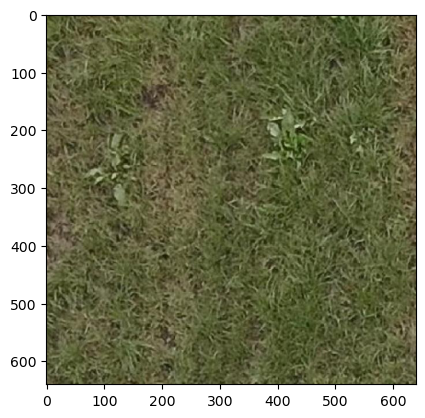

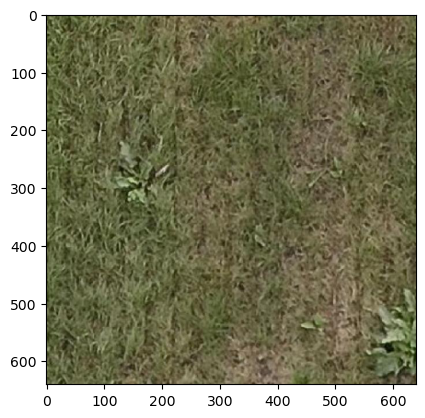

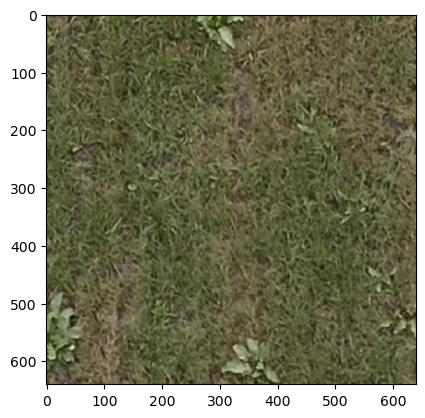

In [5]:
path = 'weed dataset/train'
allowed_extensions = ('.bmp', '.gif', '.jpeg', '.jpg', '.png')

file_list = [file_name for file_name in os.listdir(path) if os.path.splitext(file_name)[-1].lower() in allowed_extensions]

# print("Files in the directory:", file_list)

# Display a few images from the directory
for file_name in file_list[:3]:  # Display the first 3 images
    img_path = os.path.join(path, file_name)
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.show()

In [6]:
#training the model
conv_base = DenseNet121(   
    weights='imagenet',
    include_top = False, #False freezes the weights of the pre-trained DenseNet121 model.
    input_shape=(256,256,3),    ## it is done to prevent the weights from being updated during the training of the custom classification head.
    pooling='avg'
)

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 26s 1us/step


In [7]:
conv_base.trainable = False

# False freezes the weights of the pre-trained DenseNet121 model.
 It is done to prevent the weights from being updated during the training of the custom classification head.
 It will also,reduces the computational cost and training time, as only the weights of the custom classification head will be trained.

In [8]:
# Summary of the overall model
conv_base.summary()

Model: "densenet121"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, 262, 262,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,408 │ zero_padding2d[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_1    │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 64, 64,    │          0 │ zero_padding2d_1… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 64, 64,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 64, 64,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 64, 64,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 64, 64,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 64, 64,    │     12,288 │ conv2_block2_0_r

 Total params: 7,037,504 (26.85 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 7,037,504 (26.85 MB)

The model is initializing a Sequential model and adds the pre-trained DenseNet121model (conv_base) as the base.
Thn itl flattens the output from the base model and adds two fully connected layers with ReLU activation.
Batch normalization is applied after each fully connected layer to improve training stability and speed.

In [9]:
model = Sequential()
model.add(conv_base)
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.35))
model.add(BatchNormalization())
model.add(Dense(120, activation='relu'))
model.add(Dense(1, activation='softmax'))

In [10]:
model.summary()  #it generates a summary of the neural network model, displaying the architecture and parameters of each layer.

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)        │ ?                      │     7,037,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,037,504 (26.85 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 7,037,504 (26.85 MB)

In [12]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

The compile method is used to configure the model for training.
The optimizer=Adam(learning_rate=0.0001) argument specifies the Adam optimizer with a learning rate of 0.0001.
The loss='categorical_crossentropy' argument specifies the loss function used for training, which is categorical crossentropy for multi-class classification.
The metrics=['accuracy'] argument specifies the metric used to evaluate the model, which is accuracy in this case.

In [13]:
early_stopping = keras.callbacks.EarlyStopping(        #it creates an EarlyStopping callback object, which stops the training process if certain conditions are met.
    monitor="val_loss",      #specifies that the validation loss will be monitored to determine when to stop the training.
    min_delta=0,              #specifies the minimum change in the monitored quantity to qualify as an improvement.
    patience=5,              #specifies the number of epochs with no improvement after which training will be stopped.
    verbose=0,               #controls the verbosity of the output during training.
    mode="auto",             #specifies the direction of improvement to be monitored (e.g., "min" for loss or "max" for accuracy).
    baseline=None,           # Set to the value of val_loss at the desired epoch
    restore_best_weights=False,       #specifies whether to restore the model weights from the epoch with the best value of the monitored quantity.
)

In [16]:
# history = model.fit(train_ds,epochs=10,validation_data=validation_ds)
history = model.fit(train_data, epochs=10, validation_data=test_data, callbacks=[early_stopping])

Epoch 1/10


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


6/6 ━━━━━━━━━━━━━━━━━━━━ 47s 5s/step - accuracy: 1.0000 - loss: 0.9534 - val_accuracy: 1.0000 - val_loss: 1.1850
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 25s 4s/step - accuracy: 1.0000 - loss: 0.9368 - val_accuracy: 1.0000 - val_loss: 1.1166
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 25s 4s/step - accuracy: 1.0000 - loss: 0.8592 - val_accuracy: 1.0000 - val_loss: 1.0358
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 25s 4s/step - accuracy: 1.0000 - loss: 0.8152 - val_accuracy: 1.0000 - val_loss: 0.9488
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 25s 4s/step - accuracy: 1.0000 - loss: 0.7302 - val_accuracy: 1.0000 - val_loss: 0.8663
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 25s 4s/step - accuracy: 1.0000 - loss: 0.6908 - val_accuracy: 1.0000 - val_loss: 0.8298
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 26s 4s/step - accuracy: 1.0000 - loss: 0.6331 - val_accuracy: 1.0000 - val_loss: 0.7462
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 25s 4s/step - accuracy: 1.0000 - loss: 0.5861 - val_accuracy: 1.0000 - val_loss: 0.6901
Epoch 9/10
6/6 ━━━━

In [17]:
# Evaluate the model on the validation data
evaluation = model.evaluate(test_data)

# Print the evaluation metrics
print("Validation Loss:", evaluation[0])
print("Validation Accuracy:", evaluation[1])

6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 1.0000 - loss: 0.5998
Validation Loss: 0.591656506061554
Validation Accuracy: 1.0


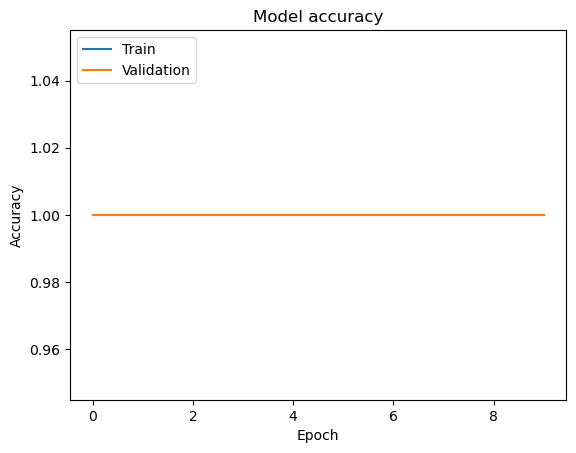

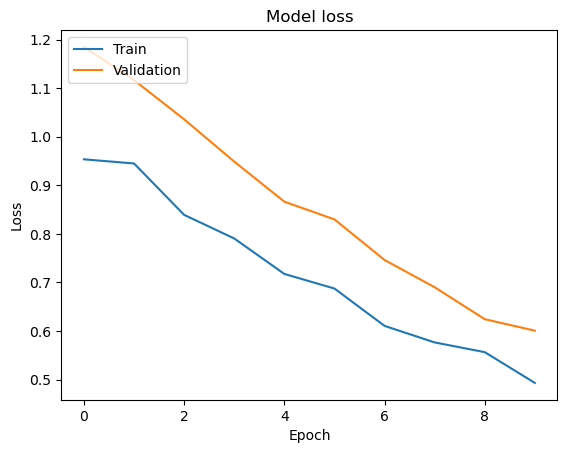

In [18]:
# Plot the metrics to visualize the training process
def plot_metrics(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

plot_metrics(history)

In [19]:
import pickle   #saving our model

In [20]:
filename = 'weed_detection.sav'
pickle.dump(model, open(filename, 'wb'))

In [21]:
# loading the saved model
loaded_model = pickle.load(open('weed_detection.sav', 'rb'))

In [29]:
## will update the app in some days soon.